## Author: Siddharth Hatkar <br>

email:siddharthahatkar@gmail.com
<br>

In [124]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os

import pandas as pd
import scipy as sc
import numpy as np

#Seaborn
import seaborn as sns

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
# where the data is stored
DATA_PATH = "data"

In [125]:
%config IPCompleter.greedy=True

### 1. Scrape Github Repository List using BeautifulSoup
In this part we will explore Github repositories, specifically the 100 most-starred repositories. We are going to scrape data from [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before we start to scrape any website we should go through the terms of service and policy documents of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) to see whether the site permits you to scrape their data or not.

**To Check:**<br>
Open the https://github.com/robots.txt , there we can see that we are allowed to scrape /\*/\*/tree/master and /\*/\*/blob/master folders.


### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved all the html files in the [data](data) folder. We will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder we will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`


Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 


In [51]:
import os
count = 0
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".html"):
        print(filename)
        if(count== 0):
            soup = BeautifulSoup(open(DATA_PATH + "/" + filename, encoding='utf8'), "html.parser")
            count = count + 1
            continue
        soup.append(BeautifulSoup(open(DATA_PATH + "/" + filename, encoding='utf8'), "html.parser"))


searchPage1.html
searchPage10.html
searchPage2.html
searchPage3.html
searchPage4.html
searchPage5.html
searchPage6.html
searchPage7.html
searchPage8.html
searchPage9.html


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-6548d5a1dd84bd83036c6a914b25b4ae.css" integrity="sha512-ZUjVod2EvYMDbGqRSyW0rpfgBq3i+gnR/4PfrzLsy5f20oIcRfgFQFVKgi3Ztp917bP1K/kdP5q8+nAlJ3+cFA==" media="all" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-1cd57b56e5c8f7c49216299a13bafc79.css" integrity="sha512-HNV7VuXI98SSFimaE7r8eVsgrmzC3
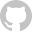
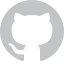

In [127]:
soup

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <link href="https://github.githubassets.com" rel="dns-prefetch"/>\n  <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>\n  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>\n  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-6548d5a1dd84bd83036c6a914b25b4ae.css" integrity="sha512-ZUjVod2EvYMDbGqRSyW0rpfgBq3i+gnR/4PfrzLsy5f20oIcRfgFQFVKgi3Ztp917bP1K/kdP5q8+nAlJ3+cFA==" media="all" rel="stylesheet"/>\n  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-1cd57b56e5c8f7c49216299a13bafc79.css" integrity="sha
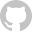
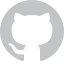

In [128]:
soup.prettify()

### 1.3. Extract Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

1. The name of the repository
+ The primary language (there are multiple or none, if multiple, use the first one, if none, use "none")
+ The number of watches
+ The number of stars
+ Number of forks
+ Number of commits
+ Number of branches
+ Number of contributors
+ Number of issues
+ Length of readme file.

Here's an example for one repository on how that data could look like: 
```python
{'name': 'Python-100-Days',
'language': 'Jupyter Notebook',
'stars': '78068',
'watches': '4822',
'forks': '30979',
'commits': 296,
'branches': 1,
'contributors': 12,
'issues': '224',
'readme': 11159}
```

Note that we will first have to extract links from the soup that you just scraped earlier. When we extract the link for the repository it will be a path to the stored html page for the repository. We will use this path to read the file and extract the above information.

In [129]:
repositories = {}
for s in soup.find_all(class_="repo-list-item hx_hit-repo d-flex flex-justify-start py-4 public source"):
    # We can get the tail by retrieving the link out the href attribute of the a tag
    link = s.find("a").get("href")
    # the subject shortname is embedded within the <a> tag
    repo = s.find("a").get_text().strip()
    try:
        plang = s.find("span", itemprop="programmingLanguage").get_text().strip()
    except:
        plang = 'None'
    name = repo.rsplit('/',1)[-1]
    repositories[repo] = {'url': link, 'name': name, 'language': plang}

In [130]:
repositories

{'freeCodeCamp/freeCodeCamp': {'url': 'freeCodeCamp/freeCodeCamp.html',
  'name': 'freeCodeCamp',
  'language': 'JavaScript'},
 '996icu/996.ICU': {'url': '996icu/996.ICU.html',
  'name': '996.ICU',
  'language': 'Rust'},
 'vuejs/vue': {'url': 'vuejs/vue.html',
  'name': 'vue',
  'language': 'JavaScript'},
 'facebook/react': {'url': 'facebook/react.html',
  'name': 'react',
  'language': 'JavaScript'},
 'tensorflow/tensorflow': {'url': 'tensorflow/tensorflow.html',
  'name': 'tensorflow',
  'language': 'C++'},
 'twbs/bootstrap': {'url': 'twbs/bootstrap.html',
  'name': 'bootstrap',
  'language': 'JavaScript'},
 'EbookFoundation/free-programming-books': {'url': 'EbookFoundation/free-programming-books.html',
  'name': 'free-programming-books',
  'language': 'None'},
 'sindresorhus/awesome': {'url': 'sindresorhus/awesome.html',
  'name': 'awesome',
  'language': 'None'},
 'getify/You-Dont-Know-JS': {'url': 'getify/You-Dont-Know-JS.html',
  'name': 'You-Dont-Know-JS',
  'language': 'None'},

In [131]:
#Looping through the repositories
for r in repositories:
    repo_soup = BeautifulSoup(open(DATA_PATH + "/" + repositories[r]['url'], encoding='utf8'), "html.parser")
    
    try:
        issues = repo_soup.find('a',{'data-hotkey':'g i'}).find(class_="Counter").get_text().strip()
    except:
        issues = '0'
    
    #issues
    repositories[r]['issues'] = issues.replace(',','').replace('+','')
    
    wsf_header=repo_soup.find(class_="container-lg mb-4 px-3 d-flex").select(".social-count")
    
    #watches
    repositories[r]['watches'] = wsf_header[0]['aria-label'].split(" ")[0]

    #stars
    repositories[r]['stars'] = wsf_header[1]['aria-label'].split(" ")[0]

    
    #forks
    repositories[r]['forks'] = wsf_header[2]['aria-label'].split(" ")[0]

    
    cbc_div=repo_soup.find(class_="numbers-summary").find_all('span',{'class': 'num text-emphasized'})

    #commits
    repositories[r]['commits'] = cbc_div[0].get_text().strip().replace(',','')
    
    #branches
    repositories[r]['branches'] = cbc_div[1].get_text().strip()

    
    #contributors
    repositories[r]['contributors'] = cbc_div[4].get_text().strip().replace(',','')

    #README
    try:
        repositories[r]['readme'] = len(repo_soup.find(id ='readme').get_text())
    except:
        repositories[r]['readme'] = 0
    
    
# repositories
print("DONE SETTING UP THE DATA..")

DONE SETTING UP THE DATA..


In [132]:
#converting into dataframe

project_info = pd.DataFrame.from_dict(repositories).transpose()
project_info.reset_index(level=0, inplace=True)
project_info = project_info.drop(columns = ['url','index'])
project_info = project_info[['name','language','stars','watches', 'forks','commits','branches','contributors','issues','readme']]
project_info[:20]

,name,language,stars,watches,forks,commits,branches,contributors,issues,readme
0,freeCodeCamp,JavaScript,308649,8376,23684,25355,5,3999,163,6216
1,996.ICU,Rust,249141,4523,21217,3019,1,605,0,4672
2,vue,JavaScript,156926,6012,23646,3085,44,289,291,2910
3,react,JavaScript,143727,6636,27597,12812,49,1361,483,3324
4,tensorflow,C++,140937,8485,79892,78840,33,2396,3102,3495
5,bootstrap,JavaScript,138610,7183,68131,19337,57,1108,331,5785
6,free-programming-books,None,137096,8564,33912,5200,12,1096,19,1830
7,awesome,None,125921,6569,16797,892,2,439,12,22750
8,You-Dont-Know-JS,None,117033,5352,23437,1654,4,169,76,2276
9,ohmyzsh,Shell,103392,2593,18729,5481,1,1498,214,9663


In [133]:
project_info.to_csv('project_info.csv', index=False)

### 2. Analyzing the repository data

In this part, we will analyze the data collectd in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. 

In [134]:
project_info = pd.read_csv('project_info.csv')
project_info[:20]

,name,language,stars,watches,forks,commits,branches,contributors,issues,readme
0,freeCodeCamp,JavaScript,308649,8376,23684,25355,5,3999,163,6216
1,996.ICU,Rust,249141,4523,21217,3019,1,605,0,4672
2,vue,JavaScript,156926,6012,23646,3085,44,289,291,2910
3,react,JavaScript,143727,6636,27597,12812,49,1361,483,3324
4,tensorflow,C++,140937,8485,79892,78840,33,2396,3102,3495
5,bootstrap,JavaScript,138610,7183,68131,19337,57,1108,331,5785
6,free-programming-books,None,137096,8564,33912,5200,12,1096,19,1830
7,awesome,None,125921,6569,16797,892,2,439,12,22750
8,You-Dont-Know-JS,None,117033,5352,23437,1654,4,169,76,2276
9,ohmyzsh,Shell,103392,2593,18729,5481,1,1498,214,9663


### Task 2.1 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what we see.


In [135]:
# project_info.issues.unique()
project_info.dtypes

# there is a infinite value for contribute, therefore I am converting it into 15600 as stated above.
project_info = project_info.replace('∞', 15600)

# Converting object type columns to int
project_info.contributors = project_info.contributors.astype(int)



In [136]:
project_info.dtypes

name            object
language        object
stars            int64
watches          int64
forks            int64
commits          int64
branches         int64
contributors     int32
issues           int64
readme           int64
dtype: object

In [137]:
# Get an overview of the data using the describe function.
project_info.describe()

,stars,watches,forks,commits,branches,contributors,issues,readme
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,71098.011111,2969.488889,15996.244444,22222.600000,33.433333,854.322222,694.222222,15756.777778
std,41043.124763,1840.600380,12584.938794,95797.079129,73.921770,1759.851838,1234.431642,29883.512108
min,43499.000000,336.000000,1148.000000,64.000000,1.000000,5.000000,0.000000,376.000000
25%,47328.250000,1571.250000,7888.250000,1324.750000,3.000000,151.250000,19.500000,2265.750000
50%,57690.000000,2535.500000,13968.500000,3267.500000,6.000000,428.500000,218.000000,4336.500000
75%,78957.500000,3584.250000,20091.750000,17243.750000,24.000000,1067.250000,491.750000,11865.500000
max,308649.000000,8564.000000,79892.000000,900539.000000,387.000000,15600.000000,5000.000000,176130.000000


In [138]:
# Compute the correlation matrix, visualize it with a heat map.
corr_mat = project_info.corr()
corr_mat

,stars,watches,forks,commits,branches,contributors,issues,readme
stars,1.000000,0.718511,0.467899,0.050483,-0.030127,0.195937,-0.021481,-0.068222
watches,0.718511,1.000000,0.713677,0.249784,-0.034666,0.334194,-0.042611,-0.025452
forks,0.467899,0.713677,1.000000,0.171526,-0.014534,0.263581,0.044675,-0.148939
commits,0.050483,0.249784,0.171526,1.000000,0.077237,0.933173,0.031560,-0.086844
branches,-0.030127,-0.034666,-0.014534,0.077237,1.000000,0.026588,0.423649,-0.143874
contributors,0.195937,0.334194,0.263581,0.933173,0.026588,1.000000,0.044608,-0.052557
issues,-0.021481,-0.042611,0.044675,0.031560,0.423649,0.044608,1.000000,-0.135236
readme,-0.068222,-0.025452,-0.148939,-0.086844,-0.143874,-0.052557,-0.135236,1.000000


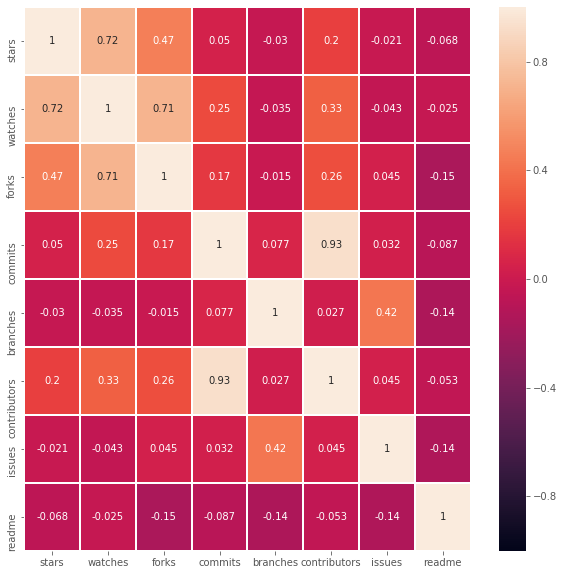

In [139]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, linewidths = 1)


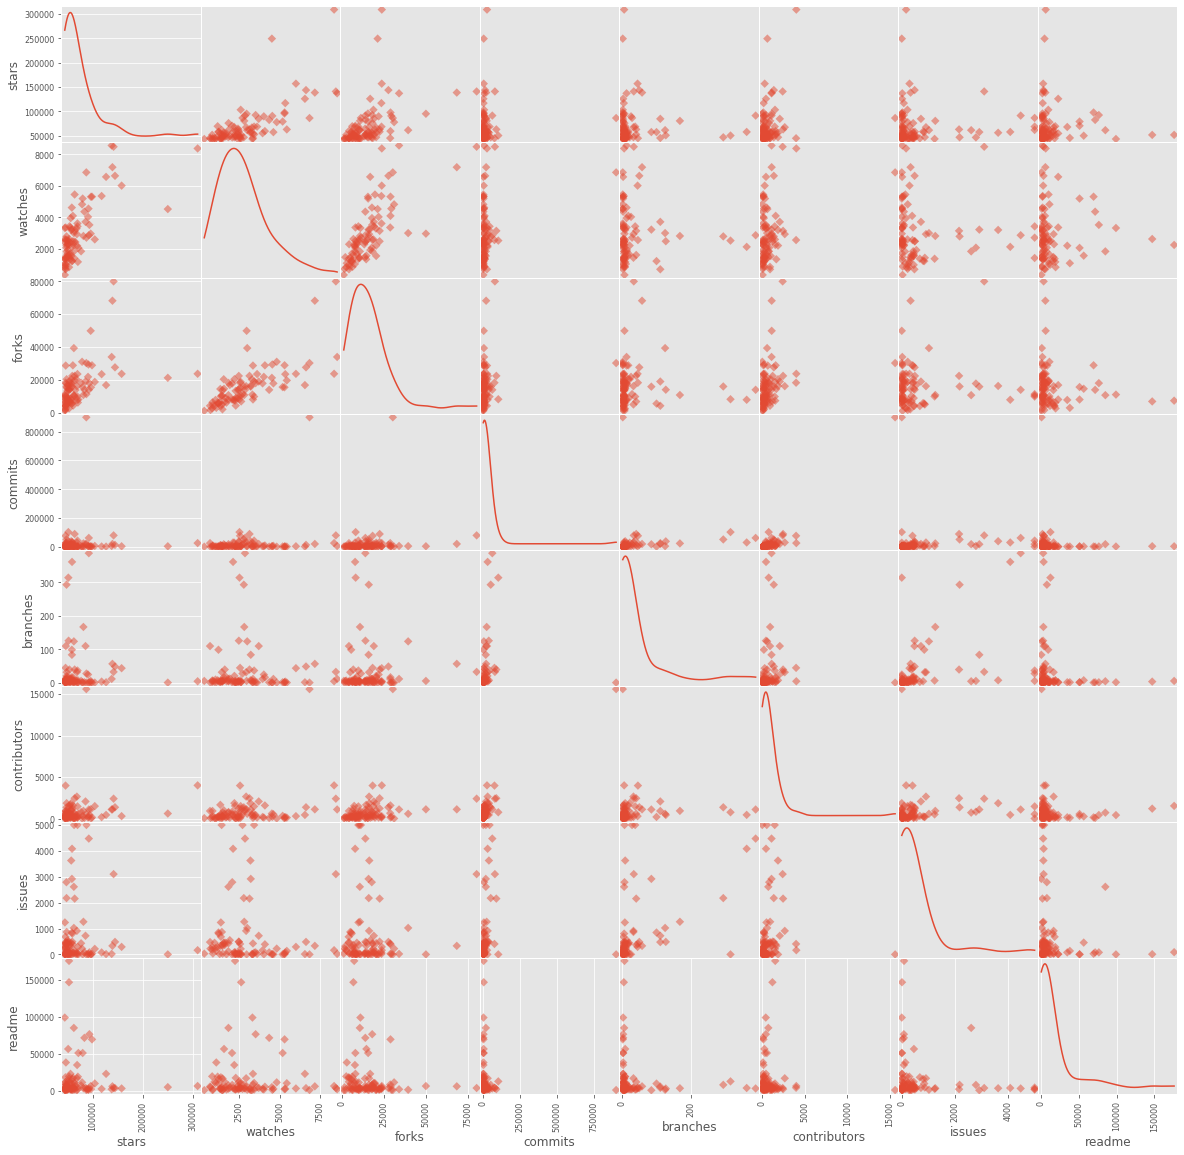

In [140]:
# Visualize the correlations by making a scatterplot matrix.
pd.plotting.scatter_matrix(project_info, figsize=(20,20), diagonal='kde', marker = 'D');


Text(0, 0.5, 'Count')

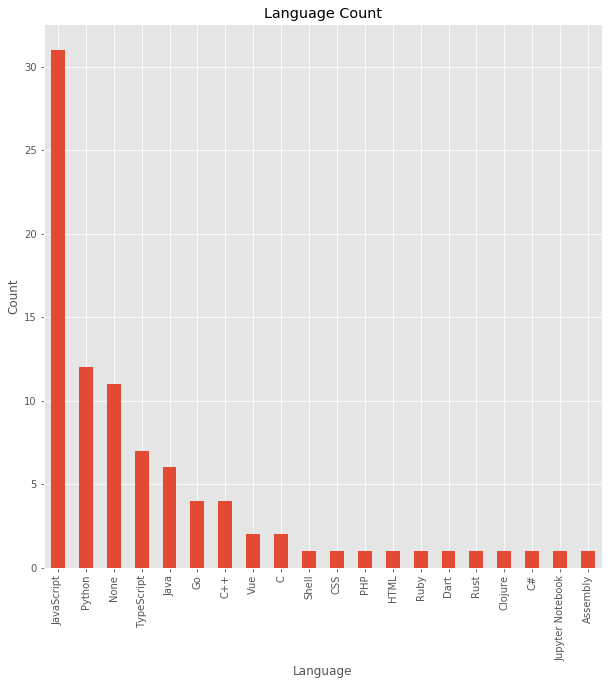

In [141]:

fig= plt.subplots(figsize=(10,10))
project_info["language"].value_counts().plot(kind='bar');
plt.title("Language Count")
plt.xlabel("Language")
plt.ylabel("Count")

## **Interpretation:** <br>
- As you can see from the heatmap for correlation matrix, the contributors are highly correlated with commits (correaltion value = 0.93).Stars and watches has a correlation value of 0.72, therefore we cab say that they are correlated.

### 2.3. Linear regression

1. Using linear regression to try to predict the number of Stars based on Forks, Contributors, Issues, and Readme Length. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Developing another model which is better. Explain why it is better and interpreting our results. 

In [143]:
p_model1 = sm.ols(formula="stars ~ forks + contributors + issues + readme", data=project_info).fit()
p_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     6.227
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           0.000192
Time:                        21:29:30   Log-Likelihood:                -1071.7
No. Observations:                  90   AIC:                             2153.
Df Residuals:                      85   BIC:                             2166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.724e+04   7342.763      6.434      0.000    3.26e+04    6.18e+04
forks            1.4625      0.326      4.490      0.000       0.815       2.110
contributors     1.8561      2.308      0.804      0.423      -2.732       6.444
issues          -1.5137      3.204     -0.472      0.638      -7.883       4.856
readme          -0.0047      0.134     -0.035      0.972      -0.270       0.261
==============================================================================
Omnibus:                      104.632   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1518.490
Skew:                           3.821   Prob(JB):                         0.00
Kurtosis:                      21.615   Cond. No.                     6.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
p_model3 = sm.ols(formula="stars ~ watches", data=project_info).fit()
p_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     93.92
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.55e-15
Time:                        21:29:30   Log-Likelihood:                -1050.5
No. Observations:                  90   AIC:                             2105.
Df Residuals:                      88   BIC:                             2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.352e+04   5767.085      4.079      0.000    1.21e+04     3.5e+04
watches       16.0219      1.653      9.691      0.000      12.736      19.307
==============================================================================
Omnibus:                       92.400   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.427
Skew:                           3.248   Prob(JB):                    1.22e-236
Kurtosis:                      18.733   Cond. No.                     6.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Your interpretation:**

### R-squared
- The regression model with one variable, *watches* gives the R-square value equal to 0.516, which is greater compare to the model created while considering forks, contributors, issues and readme. Therefore, the new model accounts for 51.6% of the variance in the data.

### F-statistics p value
- After comparing Prob(F-Statistics) of both the models, we can see that the Prob(F-Statistics) for second model is less than that of the first model. The Prob(F-Statistics) for both the model is less than 0.05 therefore we can reject the null hypothersis(i.e. null hypothesis => Beta = 0 )

### p-value
- In our first model, the p-values for issues and readme are larger than 0.05 (the default level of significance), therefore we can say that these two variables have no significane on our prediction.<br>
- After multiple tries, I found a model which has good R-square value and it's p-value is also smaller than level of significance.